🚀 STARTING PHASE 2: DATA CLEANING
✅ Data loaded: 768 rows, 9 columns
📋 Columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
🔄 REPLACING IMPOSSIBLE ZEROS WITH NaN
Glucose: 5 zeros → 0 zeros
BloodPressure: 35 zeros → 0 zeros
SkinThickness: 227 zeros → 0 zeros
Insulin: 374 zeros → 0 zeros
BMI: 11 zeros → 0 zeros

📊 MISSING DATA ANALYSIS AFTER ZERO REPLACEMENT
               missing_count  missing_percentage
Insulin                  374           48.697917
SkinThickness            227           29.557292
BloodPressure             35            4.557292
BMI                       11            1.432292
Glucose                    5            0.651042


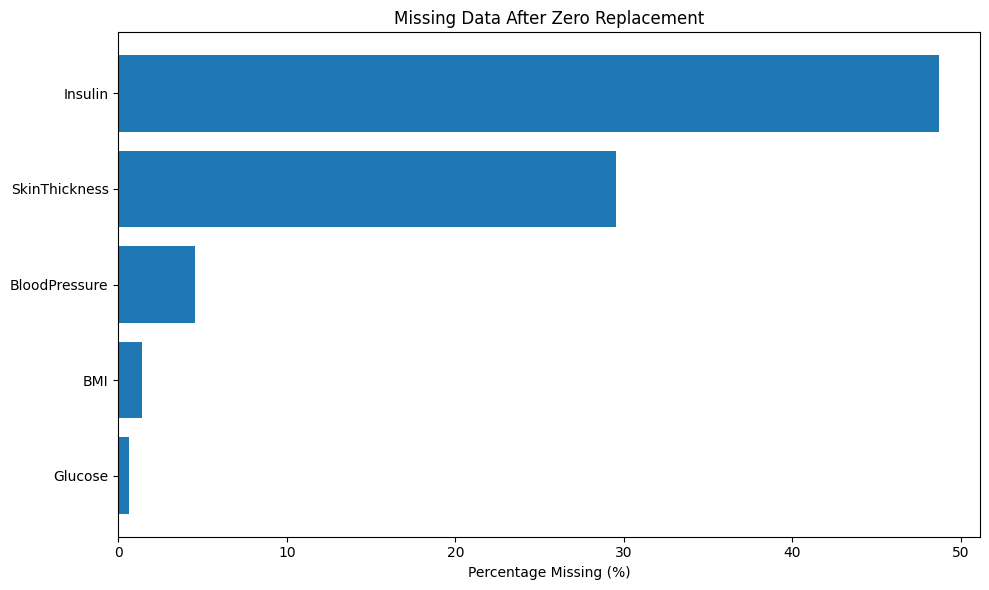


🏥 MEDICAL RANGE VALIDATION
Glucose:
  - Below 50: 1 values
  - Above 300: 0 values
  - Total violations: 1 (0.1%)
BloodPressure:
  - Below 40: 4 values
  - Above 120: 1 values
  - Total violations: 5 (0.7%)
SkinThickness:
  - Below 10: 4 values
  - Above 60: 2 values
  - Total violations: 6 (0.8%)
Insulin:
  - Below 15: 1 values
  - Above 200: 85 values
  - Total violations: 86 (11.2%)
BMI:
  - Below 15: 0 values
  - Above 50: 8 values
  - Total violations: 8 (1.0%)

🔧 IMPUTING MISSING VALUES USING MEDIAN STRATEGY
Imputing features: ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

Imputation Summary:
  - Glucose: 0 missing values imputed with 117.00
  - BloodPressure: 0 missing values imputed with 72.00
  - SkinThickness: 0 missing values imputed with 29.00
  - Insulin: 0 missing values imputed with 125.00
  - BMI: 0 missing values imputed with 32.30

📊 OUTLIER DETECTION ANALYSIS (IQR METHOD)
BloodPressure:
  - Bounds: [40.00, 104.00]
  - Outliers: 14 (1.8%)
SkinThickn

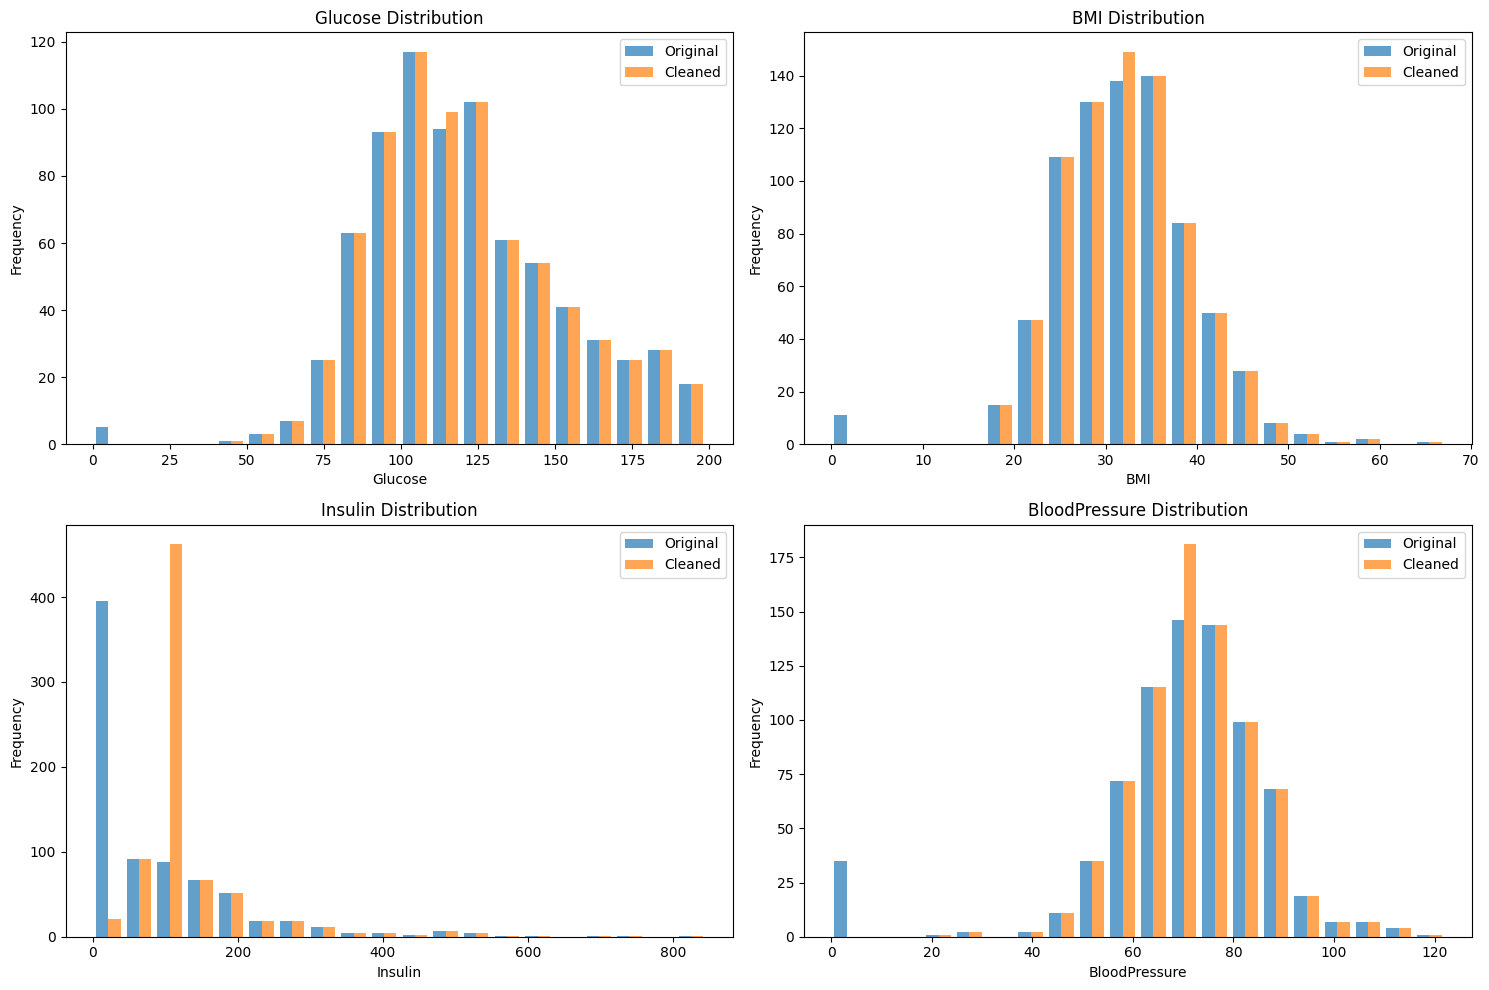

In [1]:
# Phase 2: Data Cleaning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../src')

from data_cleaning import execute_data_cleaning_pipeline
from data_understanding import DiabetesDataAnalyzer

print("🚀 STARTING PHASE 2: DATA CLEANING")
print("=" * 50)

# Load the original data
analyzer = DiabetesDataAnalyzer('../data/raw/Diabetes Missing Data.csv')
df_original = analyzer.load_data()

# Execute cleaning pipeline
df_cleaned, cleaning_report = execute_data_cleaning_pipeline(df_original)

# Save cleaned data
df_cleaned.to_csv('../data/processed/diabetes_cleaned.csv', index=False)
print("\n💾 Cleaned data saved to: ../data/processed/diabetes_cleaned.csv")

# Compare before and after
print("\n🔄 COMPARISON: BEFORE vs AFTER CLEANING")
print("=" * 50)

print("Original data shape:", df_original.shape)
print("Cleaned data shape:", df_cleaned.shape)

print("\nMissing values comparison:")
missing_original = df_original.isnull().sum().sum()
missing_cleaned = df_cleaned.isnull().sum().sum()
print(f"Original: {missing_original} missing values")
print(f"Cleaned: {missing_cleaned} missing values")

# Visualize data distribution before and after cleaning for key features
key_features = ['Glucose', 'BMI', 'Insulin', 'BloodPressure']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(key_features):
    axes[i].hist([df_original[feature], df_cleaned[feature]], 
                bins=20, alpha=0.7, label=['Original', 'Cleaned'])
    axes[i].set_title(f'{feature} Distribution')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

plt.tight_layout()
plt.show()